In [1]:
using_colab = 'google.colab' in str(get_ipython())
if using_colab:
  !git clone https://github.com/mahynski/chemometrics.git
  !cd chemometrics; pip install -r requirements.txt
else:
  import sys
  sys.path.append('../../')

import chemometrics

import matplotlib.pyplot as plt
%matplotlib notebook

import watermark
%load_ext watermark

%load_ext autoreload
%autoreload 2

Cloning into 'chemometrics'...
remote: Enumerating objects: 638, done.
remote: Counting objects: 100% (638/638), done.
remote: Compressing objects: 100% (464/464), done.
remote: Total 638 (delta 377), reused 371 (delta 161), pack-reused 0
Receiving objects: 100% (638/638), 8.34 MiB | 5.08 MiB/s, done.
Resolving deltas: 100% (377/377), done.
     |████████████████████████████████| 86 kB 2.8 MB/s 
     |████████████████████████████████| 1.1 MB 3.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=c2a9124f80c14726823db03584a058190bc5fc72bef752c2637f64587f443d15
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=fb2a9de717c53781da45fd5df280cc85393117f3a3963aa7d581970e04bf97db
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully

In [2]:
import sklearn

import numpy as np
import pandas as pd

Overview
--------

This is an example of how to use PCA to inspect data for outliers or extreme points.

In [3]:
%watermark -t -m -v --iversions

Python implementation: CPython
Python version       : 3.7.12
IPython version      : 5.5.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.4.144+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

matplotlib: 3.2.2
watermark : 2.3.0
IPython   : 5.5.0
pandas    : 1.3.5
sklearn   : 0.0
numpy     : 1.19.5



# Load the Data

In [4]:
# Let's load some data from the tests/ for this example
if using_colab:
    loc = 'https://raw.githubusercontent.com/mahynski/chemometrics/master/tests/data/pca_train.csv'
else:
    loc = '../tests/data/pca_train.csv'
df = pd.read_csv(loc)

In [5]:
df.head()

,Group,Name,Li,B,Na,Mg,Al,K,Ca,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,As,Se,Rb,Sr,Y,Mo,Cd,Sn,Sb,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Dy,Ho,Er,Tm,Yb,Lu,Pb,U
0,1,jpn_001,0.001287,0.435363,2.567587,143.601117,0.009235,818.961080,36.075419,0.000399,0.009406,5.588999,1.179842,0.003911,0.251769,1.880074,14.826704,0.120857,0.009056,1.760149,0.052328,0.000198,0.749716,0.035568,0.000078,0.000009,0.001019,0.050093,0.000381,0.001315,0.000231,0.000655,0.000189,1.318100e-04,0.000629,0.000041,0.000108,0.000385,0.000182,0.000295,0.000059,0.000182,0.000174
1,1,jpn_002,0.001474,0.385210,4.595786,276.591018,0.084693,863.273852,50.704790,0.000337,0.004937,11.646093,2.225699,0.002475,0.218762,2.086228,14.271337,0.143912,0.010985,2.113174,0.062076,0.000197,1.048099,0.106188,0.004711,0.000281,0.002275,0.074251,0.001079,0.000208,0.000036,0.000073,0.000161,1.823270e-04,0.000592,0.000386,0.000051,0.000148,0.000021,0.000003,0.000023,0.000443,0.000723
2,1,jpn_003,0.000748,0.289601,5.806715,117.037380,0.119564,851.174760,46.020288,0.000393,0.008337,7.276506,0.891494,0.004361,0.149201,1.576837,13.296230,0.108307,0.010252,1.678914,0.050958,0.000030,1.187536,0.040575,0.001262,0.000220,0.001482,0.012188,0.000058,0.001106,0.000331,0.000900,0.000373,7.401510e-07,0.000717,0.000353,0.000192,0.000434,0.000194,0.000054,0.000016,0.001359,0.000029
3,1,jpn_004,0.000882,0.525801,0.554544,335.195531,0.388480,836.126629,45.437616,0.000782,0.007553,8.230912,2.767076,0.004786,0.144116,1.839851,19.710801,0.103352,0.001856,3.370577,0.056052,0.000137,0.432030,0.019367,0.003006,0.000286,0.009385,0.157914,0.000448,0.000525,0.000323,0.000294,0.000125,1.283760e-04,0.000481,0.000124,0.000041,0.000012,0.000180,0.000264,0.000029,0.000948,0.000236
4,1,jpn_005,0.001387,0.659031,3.102831,213.051823,0.106865,756.238004,39.155470,0.000444,0.009066,7.811900,1.343417,0.003109,0.475605,3.666027,16.189443,0.216891,0.003962,0.606526,0.027639,0.000187,1.042226,0.020921,0.002497,0.000243,0.000090,0.059309,0.000110,0.001945,0.000102,0.000195,0.000009,1.014040e-04,0.000464,0.000608,0.000031,0.000178,0.000102,0.000050,0.000125,0.001060,0.000130


In [6]:
raw_x = np.array(df.values[:,2:], dtype=float) # Extract features

# Model the Data with PCA

In [7]:
from chemometrics.classifier.pca import PCA

In [8]:
model = PCA(n_components=2, alpha=0.05, gamma=0.01, scale_x=True)

In [9]:
_ = model.fit(raw_x)

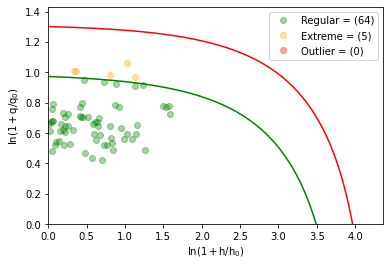

In [10]:
_ = model.visualize(raw_x)

In [11]:
extremes_mask, outliers_mask = model.check_outliers(raw_x)

In [12]:
regular_mask = model.predict(raw_x)

In [13]:
np.any(extremes_mask)

True

In [14]:
np.any(outliers_mask)

False